In [1]:
#Comenzaremos importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.

import os #establecer directorios de trabajo
import numpy as np # Métodos numéricos y manipulación de array
import matplotlib.pyplot as plt #Data frame
import seaborn as sns; sns.set() #componente gráfico
import seaborn as sb
import pandas as pd # Data frame
import pandas as py # Data frame
from scipy.spatial import distance
from sklearn.preprocessing import  MinMaxScaler
from sklearn.cluster import KMeans # se utiliza para el clustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Leemos el archivo csv (por sencillez, se considera que estará en el mismo directorio que el archivo de notebook .ipynb) y lo asignamos mediante Pandas a la variable dataframe. Mediante el método dataframe.head() vemos en pantalla los 5 primeros registros.

In [2]:
## Establecer directorio de trabajo  e importar el Dataframe forbes2022
os.chdir('C:\\Users\\andre\\OneDrive\\Escritorio\\Inteligencia artificial\\UNIDAD 1')
print(os.getcwd())
print(os.listdir())


C:\Users\andre\OneDrive\Escritorio\Inteligencia artificial\UNIDAD 1
['1. Introduccion.ipynb', '2. Numpy.ipynb', '3. PandasForbes.ipynb', 'Actividad 1.docx', 'Actividad 1.pdf', 'Data set', 'Untitled-1.ipynb']


In [3]:
# Importamos el archivo csv -para simplificar, suponemos que el archivo se encuentra en el mismo
# directorio que el notebook- y vemos los primeros 5 registros del archivo tabulados.

# Import and pre-visualization
df = pd.read_csv(r'Data set/Cancer_de_mama.csv',encoding= 'latin-1',sep=';')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1296572,10,9,8,7,6,4,7,10,3,4
1,1298416,10,6,6,2,4,10,9,7,1,4
2,1299596,6,6,6,5,4,10,7,6,2,4
3,1105524,4,1,1,1,2,1,1,1,1,2
4,1181685,1,1,2,1,2,1,2,1,1,2


In [4]:
df=df.replace(',','',regex= True)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1296572,10,9,8,7,6,4,7,10,3,4
1,1298416,10,6,6,2,4,10,9,7,1,4
2,1299596,6,6,6,5,4,10,7,6,2,4
3,1105524,4,1,1,1,2,1,1,1,1,2
4,1181685,1,1,2,1,2,1,2,1,1,2


In [5]:
df.dtypes 

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [7]:
# filtrar datos mediante indices con la funcion iloc y cambiar el tipo de dato a float con la funcion astype.
df['Clump Thickness']=df['Clump Thickness'].astype(float)
df['Uniformity of Cell Size']=df['Uniformity of Cell Size'].astype(float)
df['Uniformity of Cell Shape']=df['Uniformity of Cell Shape'].astype(float)
df['Single Epithelial Cell Size']=df['Single Epithelial Cell Size'].astype(float)
df['Bland Chromatin']=df['Bland Chromatin'].astype(float)
df['Mitoses']=df['Mitoses'].astype(float)
df['Marginal Adhesion']=df['Marginal Adhesion'].astype(float)
df['Sample code number']=df['Sample code number'].astype(float)
df['Marginal Adhesion']=df['Marginal Adhesion'].astype(float)
df['Bare Nuclei']=df['Bare Nuclei'].astype(float)

In [6]:
df=df.replace('\$','',regex=True)

In [7]:
print(df.groupby('Class').size())

Class
2    507
4    192
dtype: int64


A continuación llamamos al método dataframe.describe() que nos dará algo de información estadística básica de nuestro set de datos. La Media, el desvío estándar, valores mínimo y máximo de cada característica.

In [8]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.00000,699.000000,699.000000,699.000000,699.000000
mean,1.088637e+06,4.180258,2.881259,2.909871,2.670959,2.866953,3.09299,3.143062,2.490701,1.420601,2.549356
std,8.358828e+05,2.525880,3.019788,2.894843,2.840638,1.848343,3.44023,2.571525,2.839723,1.472938,0.893343
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.000000
25%,7.874510e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,2.000000
50%,1.190546e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.00000,2.000000,1.000000,1.000000,2.000000
75%,1.297522e+06,5.000000,4.000000,4.000000,3.000000,3.000000,4.00000,4.000000,2.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,4.000000


Tengo 8 datos duplicados
En general los datos estan bastante correlacionados entre si, 0,50 como minimo, eso significa que tengo que elegir bien las variables para mi modelo porque si elijo variables muy correlacionadas entre si mi modelo no va a funcionar (por ej Uniformity of Cell Size y Uniformity of Cell Shape, estan muy correlacionadas entre si, tengo que usar una o otra pero no las dos
El rango de los datos es bastante uniforme, de 1 al 10 en todos los casos, la distribucion varia por supuesto pero esto significa que no tengo que discretizar las variables
La variable Bare Nuclei tiene algunos nulos representados con un ?, voy a tener que resolverlo para convertir la variable en numerica

In [9]:
df[df.duplicated()]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
96,1321942,5,1,1,1,2,1,3,1,1,2
219,466906,1,1,1,1,2,1,1,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
465,1296572,10,9,8,7,6,4,7,10,3,4
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


Hay 54 datos duplicados de la variable ID 'Sample code number', mi opinion es no eliminarlos dado que las muestras pueden
variar y si dan resultados diferentes es informacion valiosa para el modelo

In [10]:
df[df.duplicated('Sample code number')].shape[0]

270

Elimino los 8 duplicados

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df = df.reset_index()

In [13]:
df.drop(['index','Sample code number'],axis = 1,inplace = True)

Para el modelo, reemplazo los valores 2 (no tiene cancer) y 4 (tiene cancer) por 0 y 1

In [14]:
df['Class'] = df['Class'].replace(2,0)
df['Class'] = df['Class'].replace(4,1)

Dado que no necesito discretizar las variables y considerando que son solo 16 datos de este tipo, tome la decision de usar
la mediana para reemplazar los valore

In [15]:
df[df['Bare Nuclei'] != '?']['Bare Nuclei'].median()

1.0

De esta manera, puedo convertir la variable en Bare Nuclei como numerica

In [16]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?',1)

In [17]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype(np.int64)

Un vistazo general de la distribucion de los datos, se puede ver como en general los datos tienen una distribucion parecida

La correlacion muestra con el problema del punto 2, como se correlacionan las variables entre si y como casi todas las
variables estan fuertemente correlacionadas con nuestro target

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


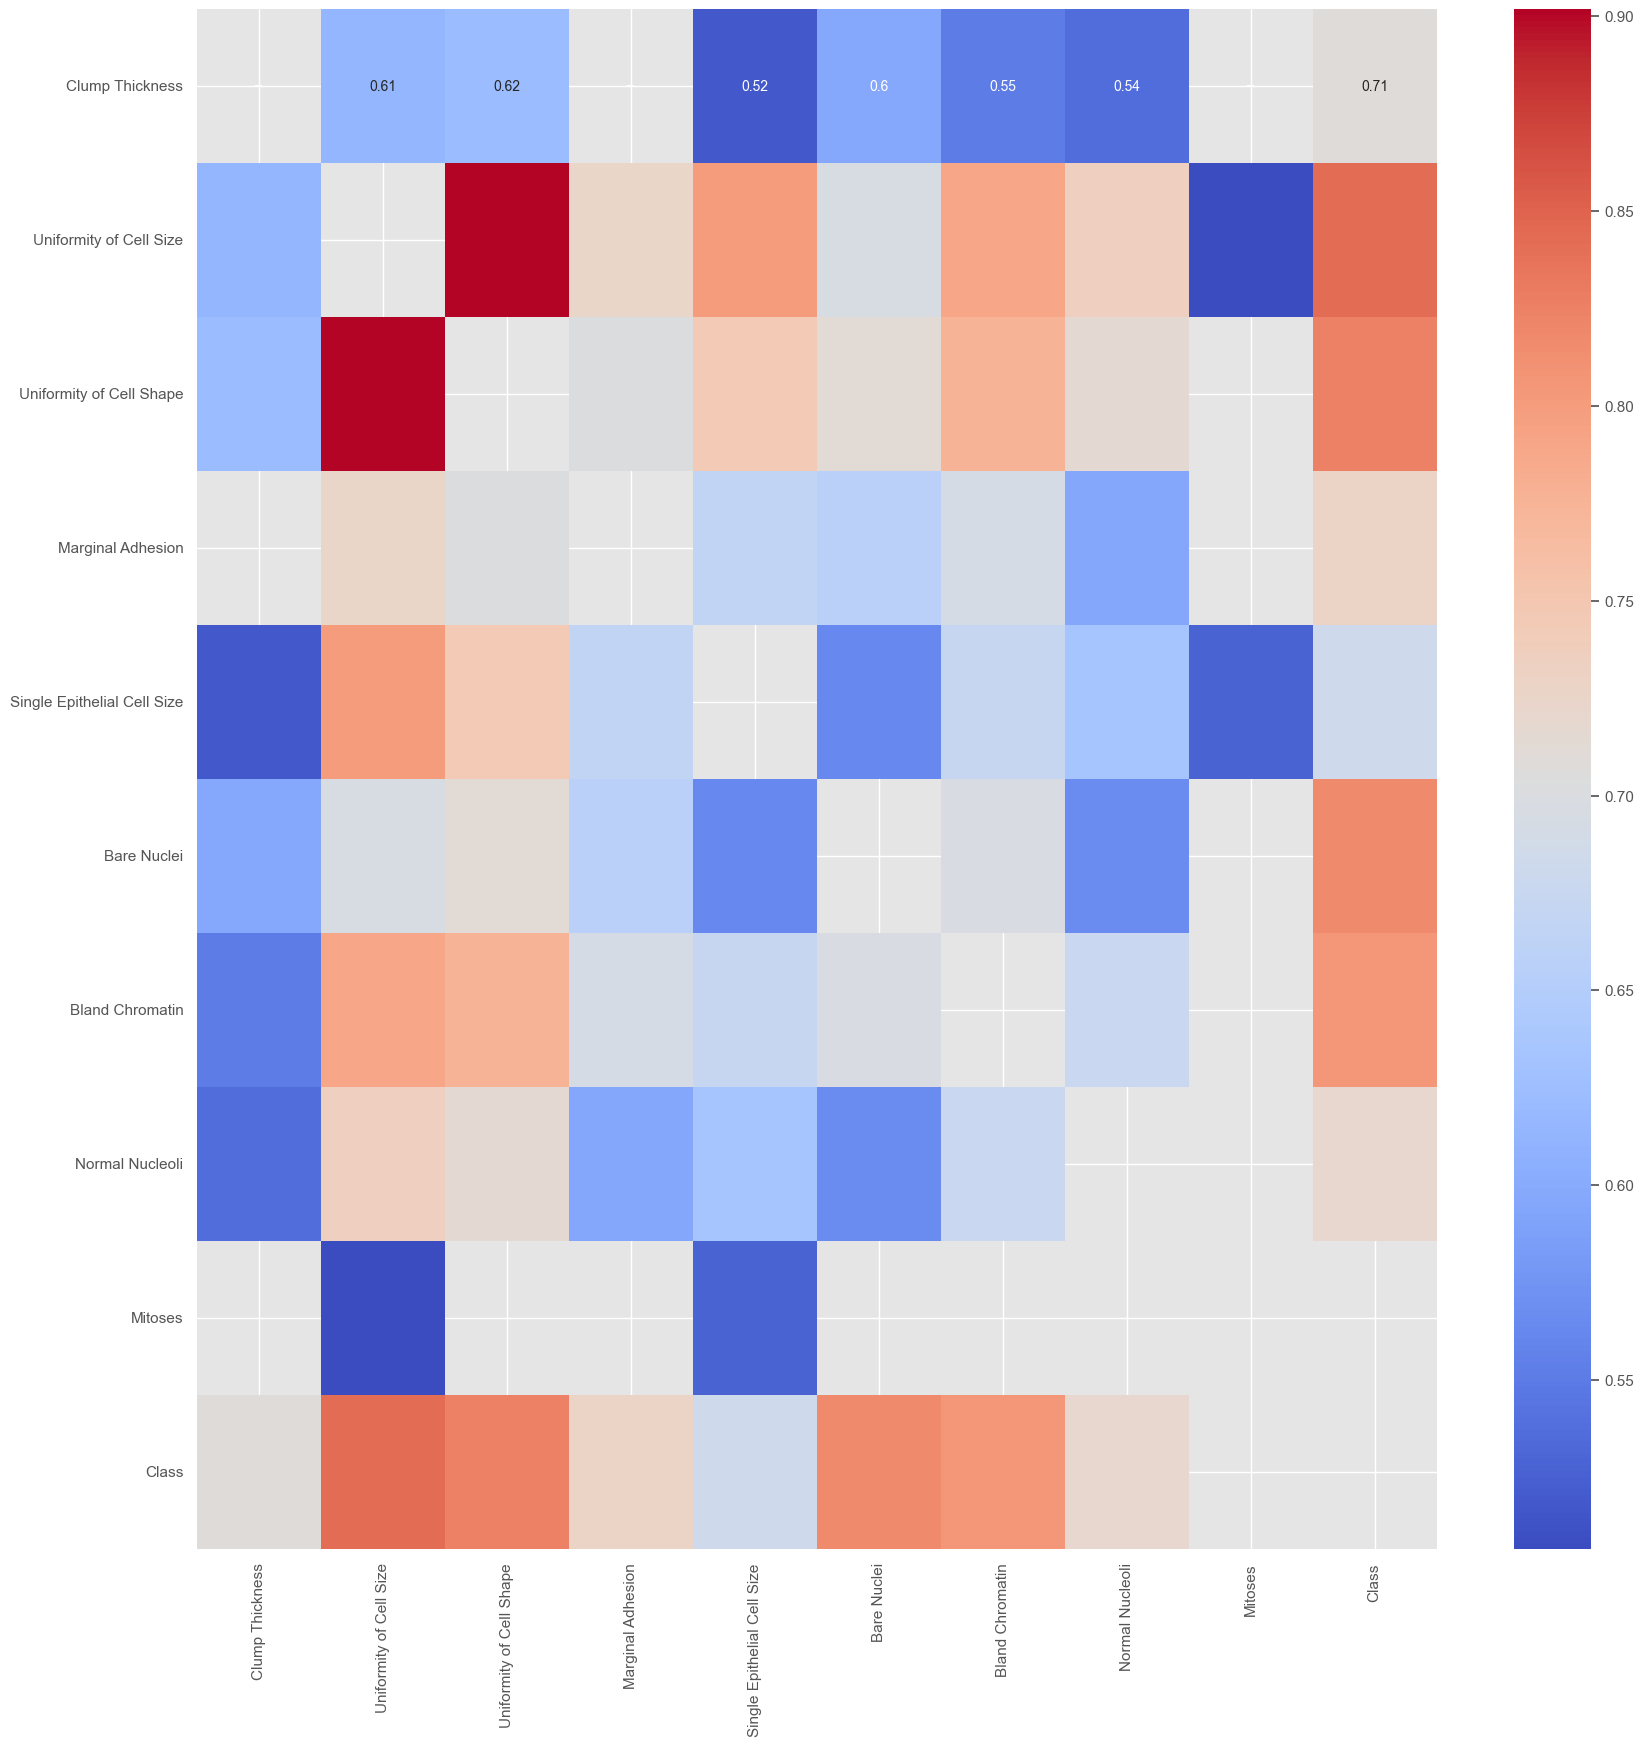

In [18]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(20,20))
sns.heatmap(filteredDf, annot=True, cmap="coolwarm")
plt.show()

CREACIÓN DEL MODELO

In [19]:
x_data=df.drop(['Class'], axis=1)
y_data=df['Class']

Para el modelo, usare las siguientes variables que considero que no estan tan correlacionadas entre si y tienen una fuerte relacion con class

In [20]:
x_data = x_data[['Uniformity of Cell Shape','Bare Nuclei','Normal Nucleoli','Clump Thickness']]

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

Primero, probemos una regresion logistica

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

pred_tr=model.predict(x_train)
pred_ts=model.predict(x_test)

Podemos ver que el modelo nos da una tasa de acierto bastante alta y el modelo marca claramente que es positivo y que es negativo sin , habria que
investigar como reducir los falsos negativos dado que estamos trabajando con datos que predicen cancer

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

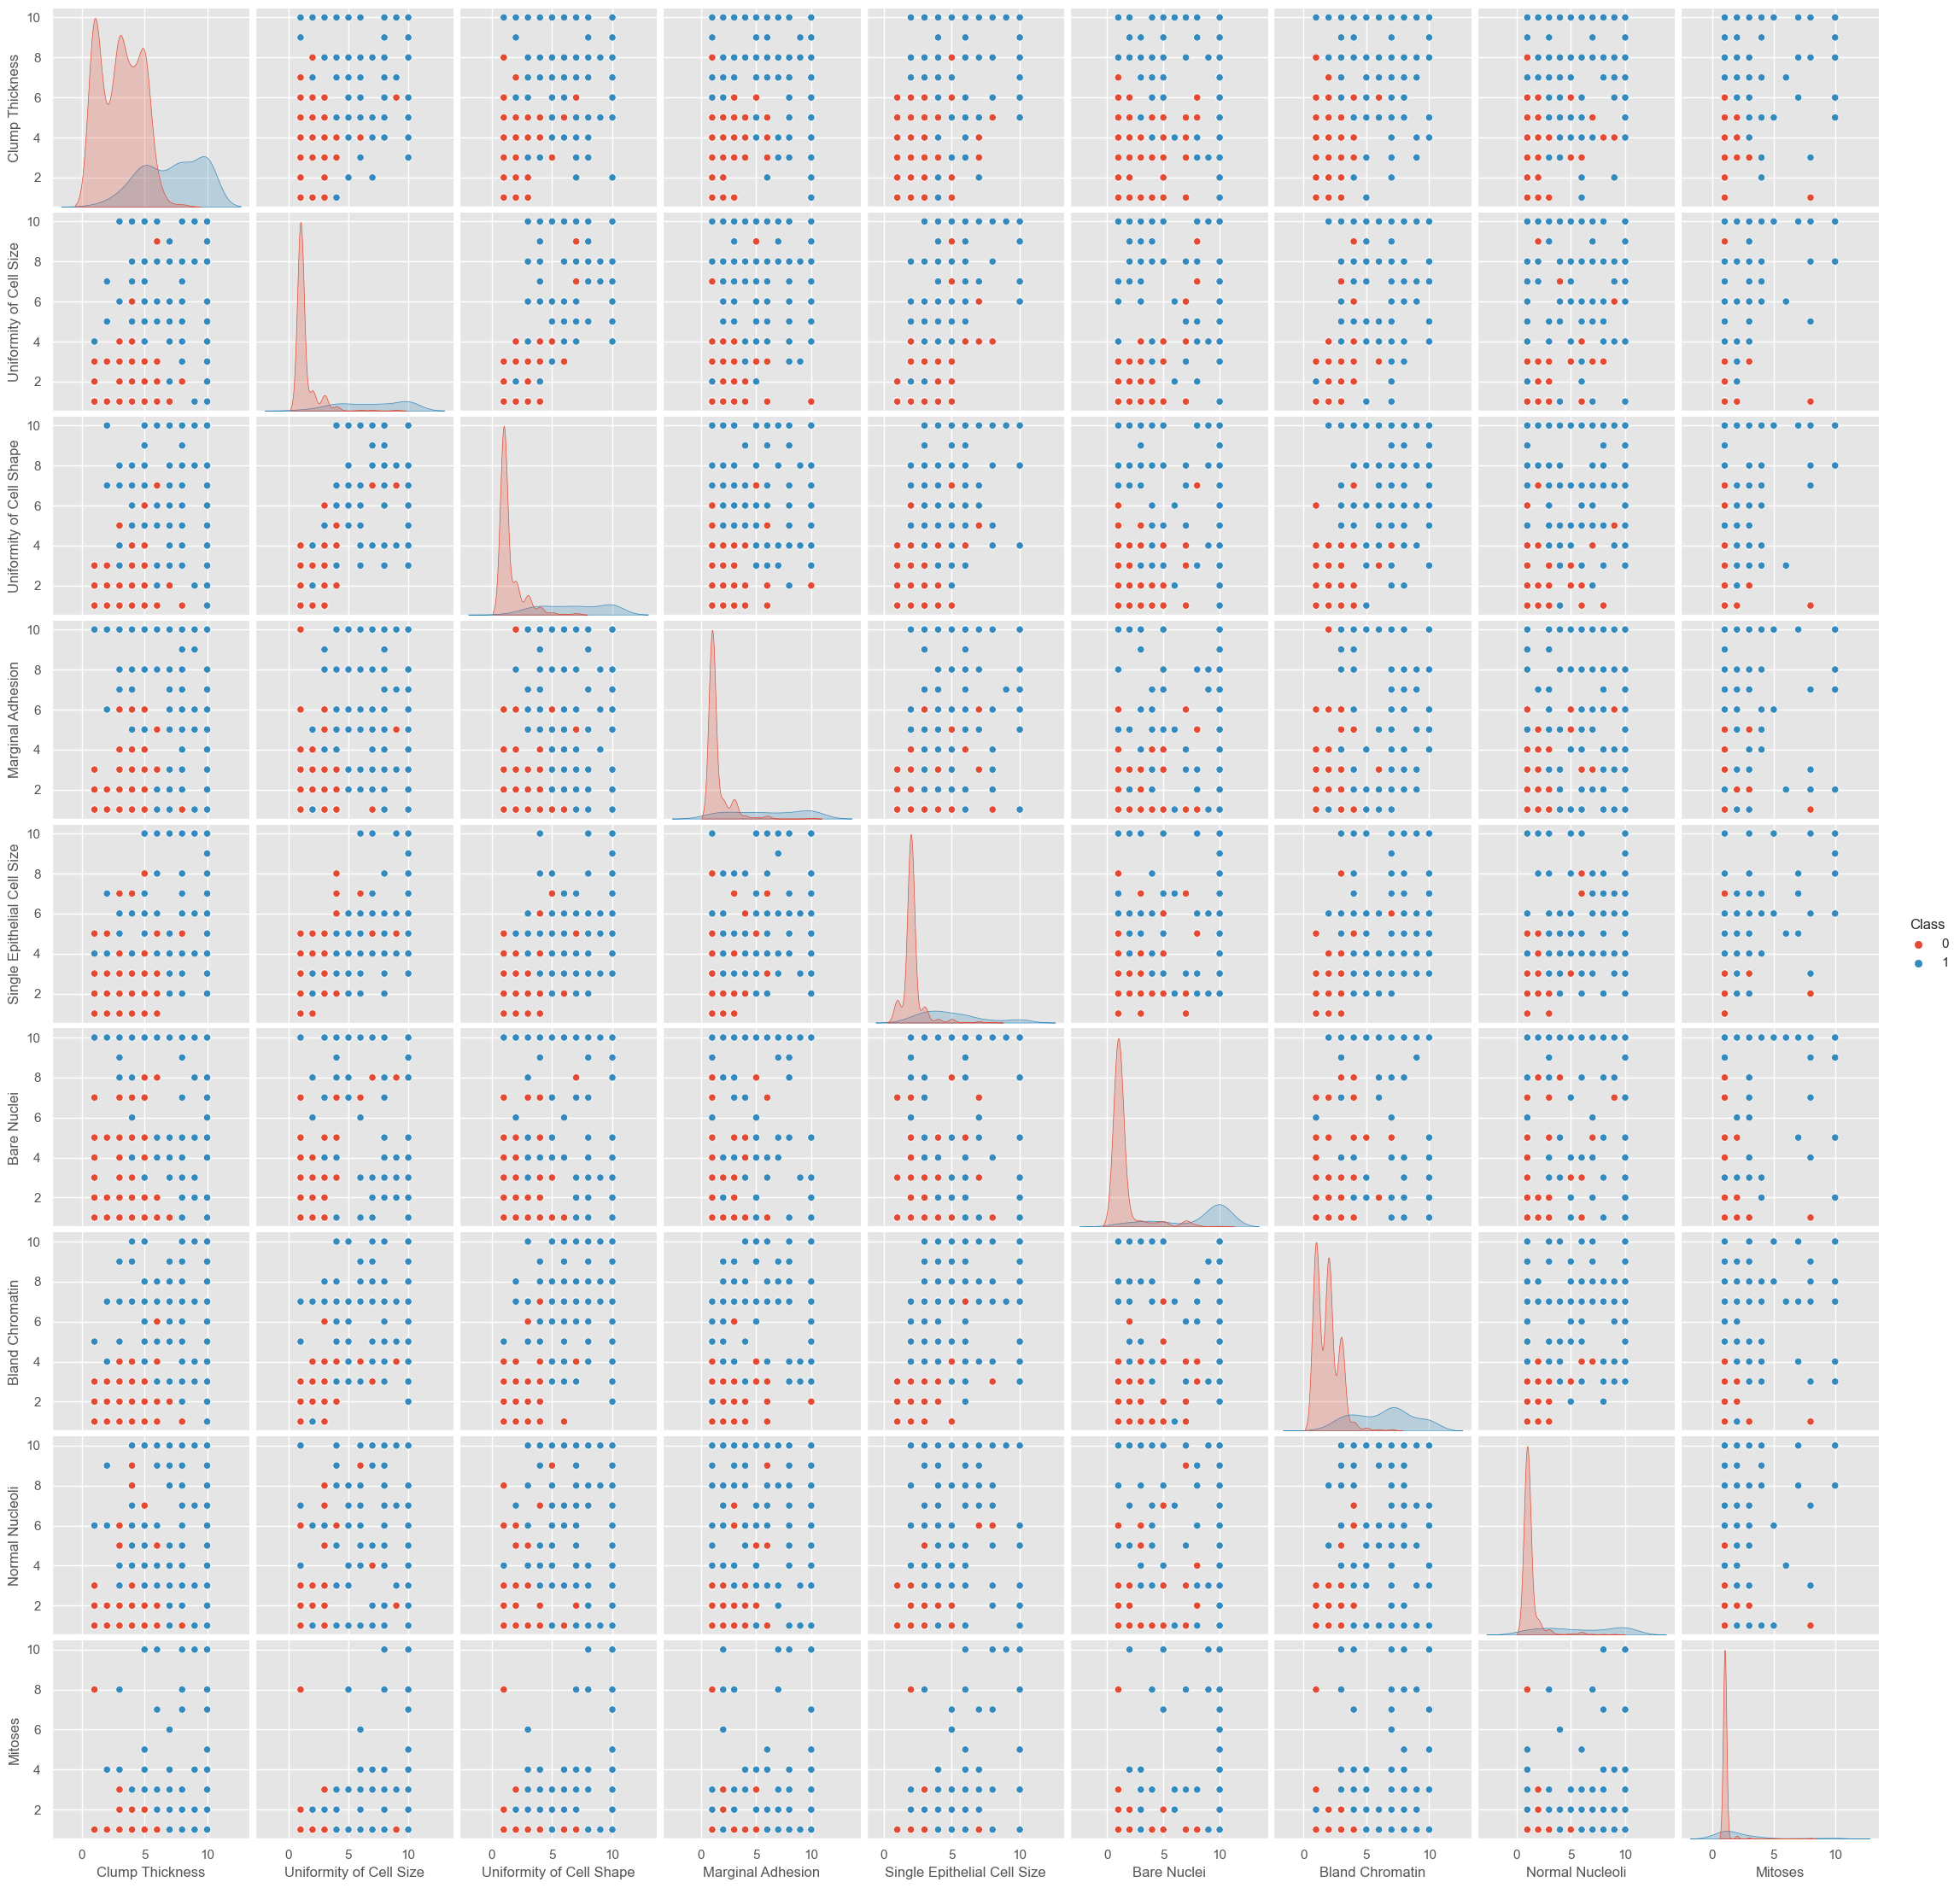

In [24]:
sns.pairplot(df.iloc[:,:],hue='Class')
plt.show()

In [25]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

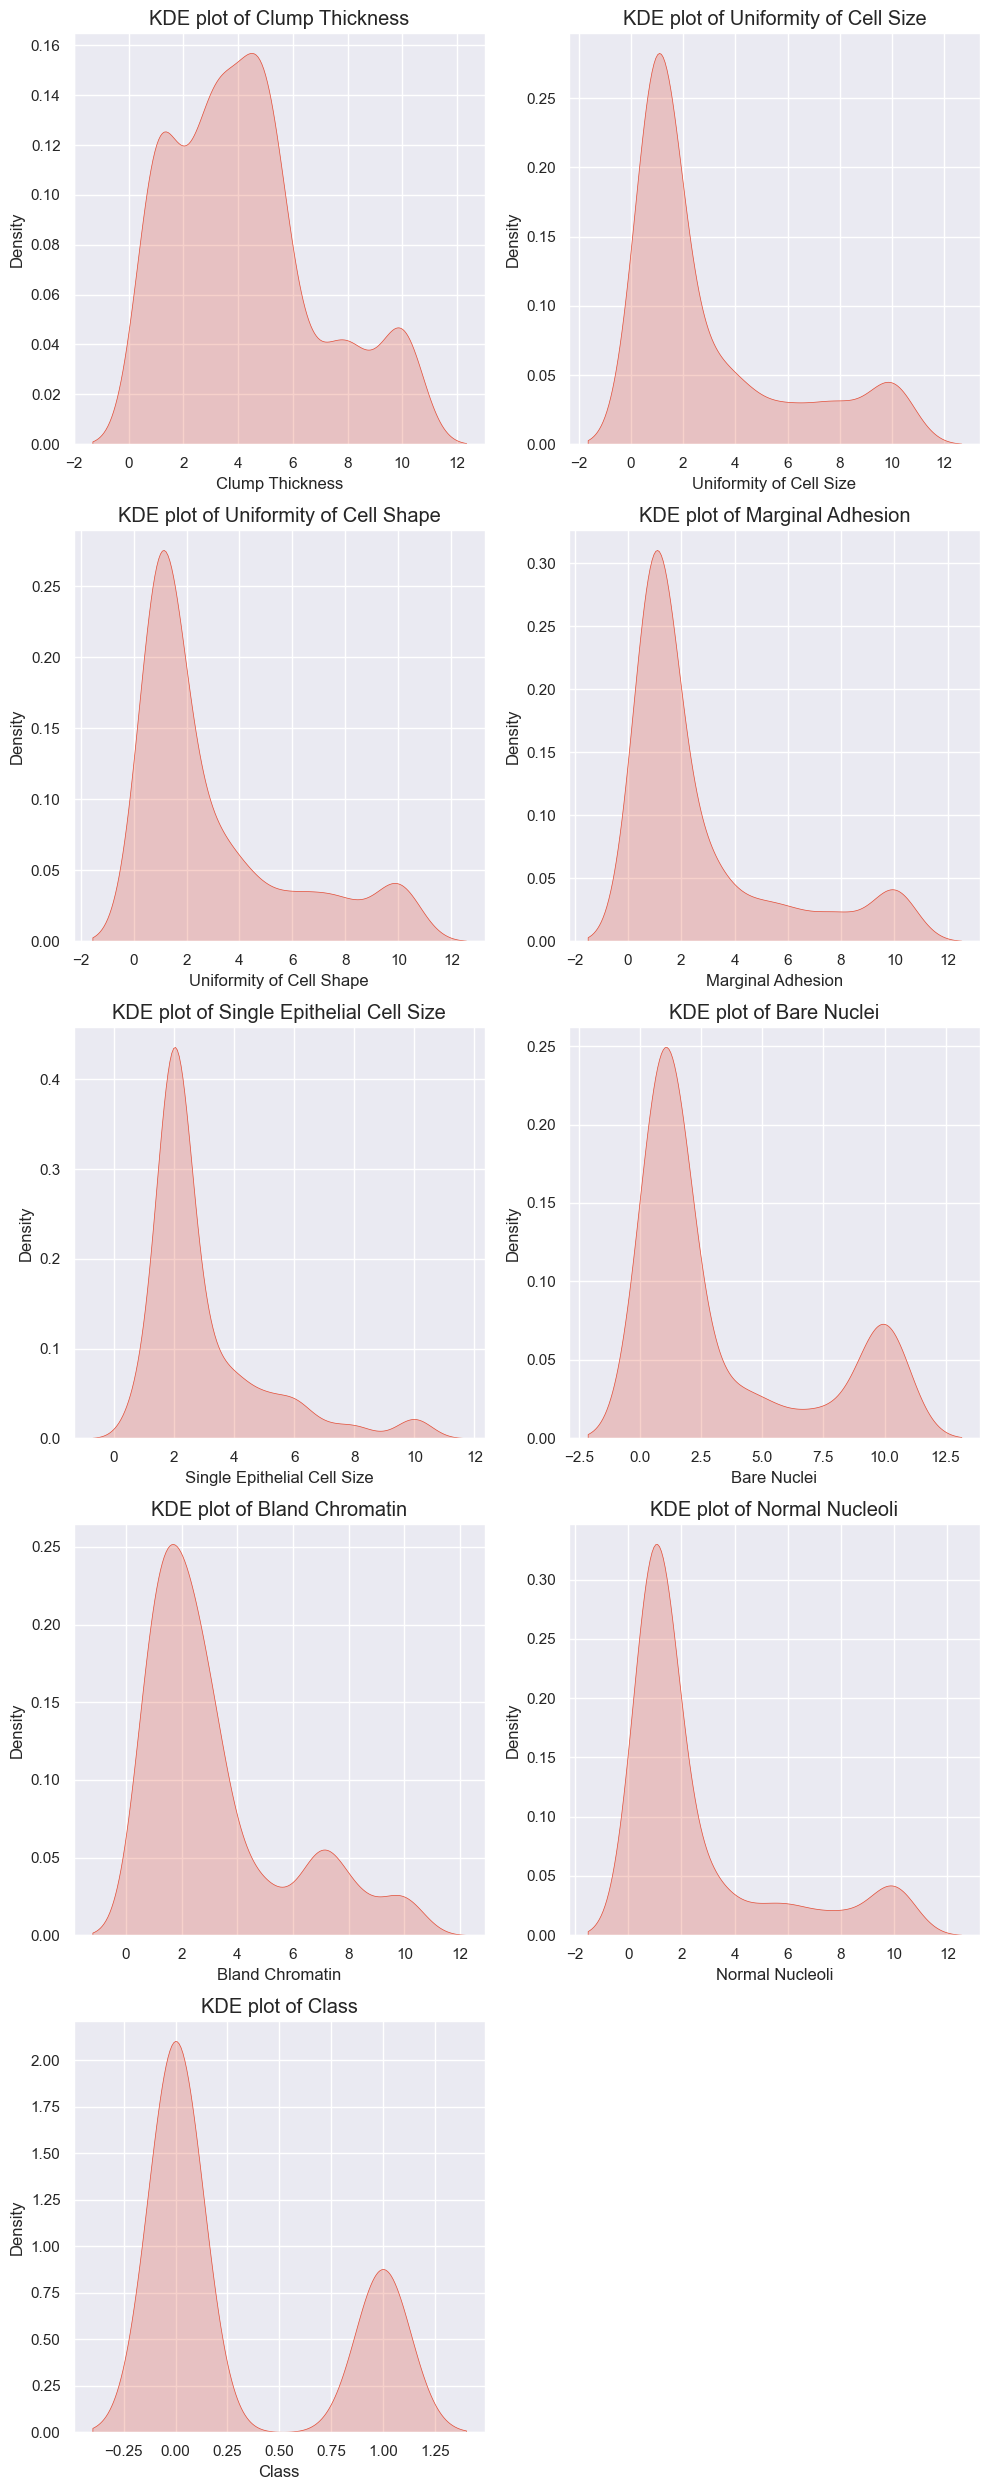

In [34]:
# Kernel Density Estimate (KDE) plots for each variable
num_columns = len(df.columns.drop('Class'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Mitoses')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

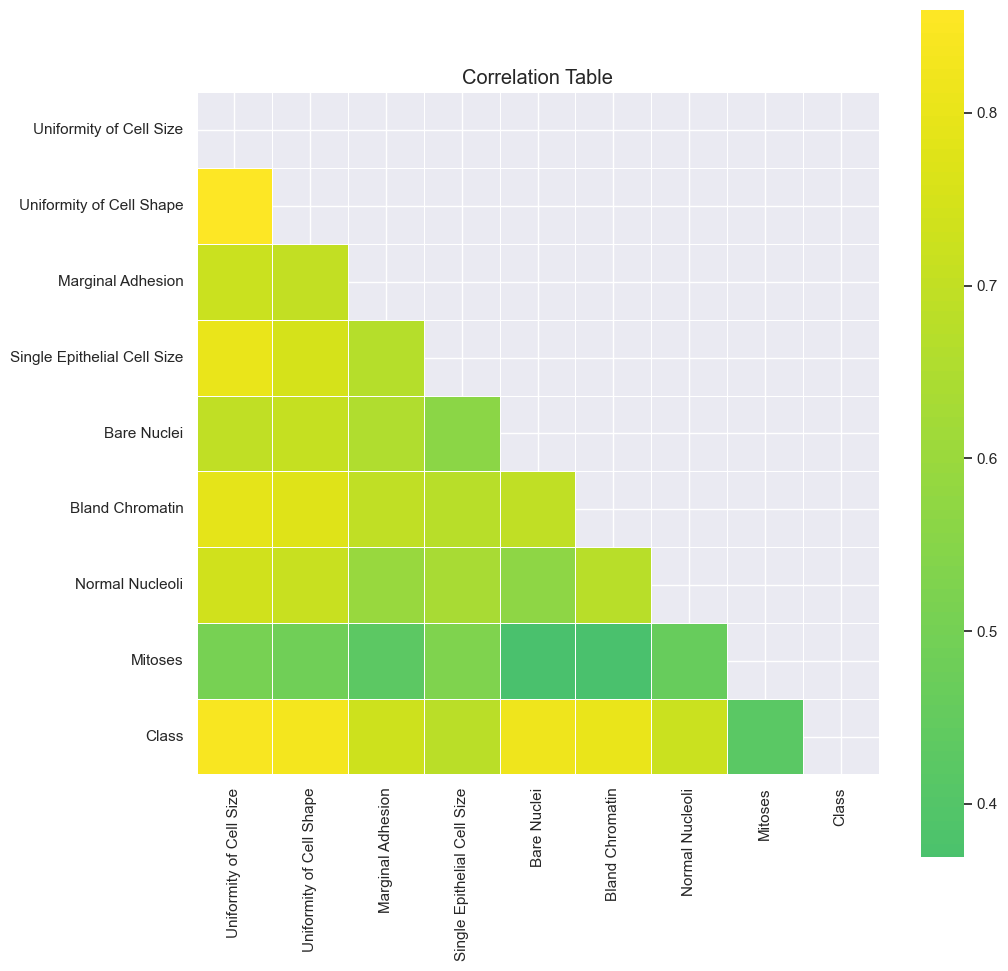

In [36]:
# Calculate the correlation matrix excluding the index column
corr = df.iloc[:, 1:].corr()
plt.figure(figsize=(11, 11))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, robust=True, center=0, square=True, cmap="viridis", linewidths=0.6)
plt.title('Correlation Table')
plt.show()

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

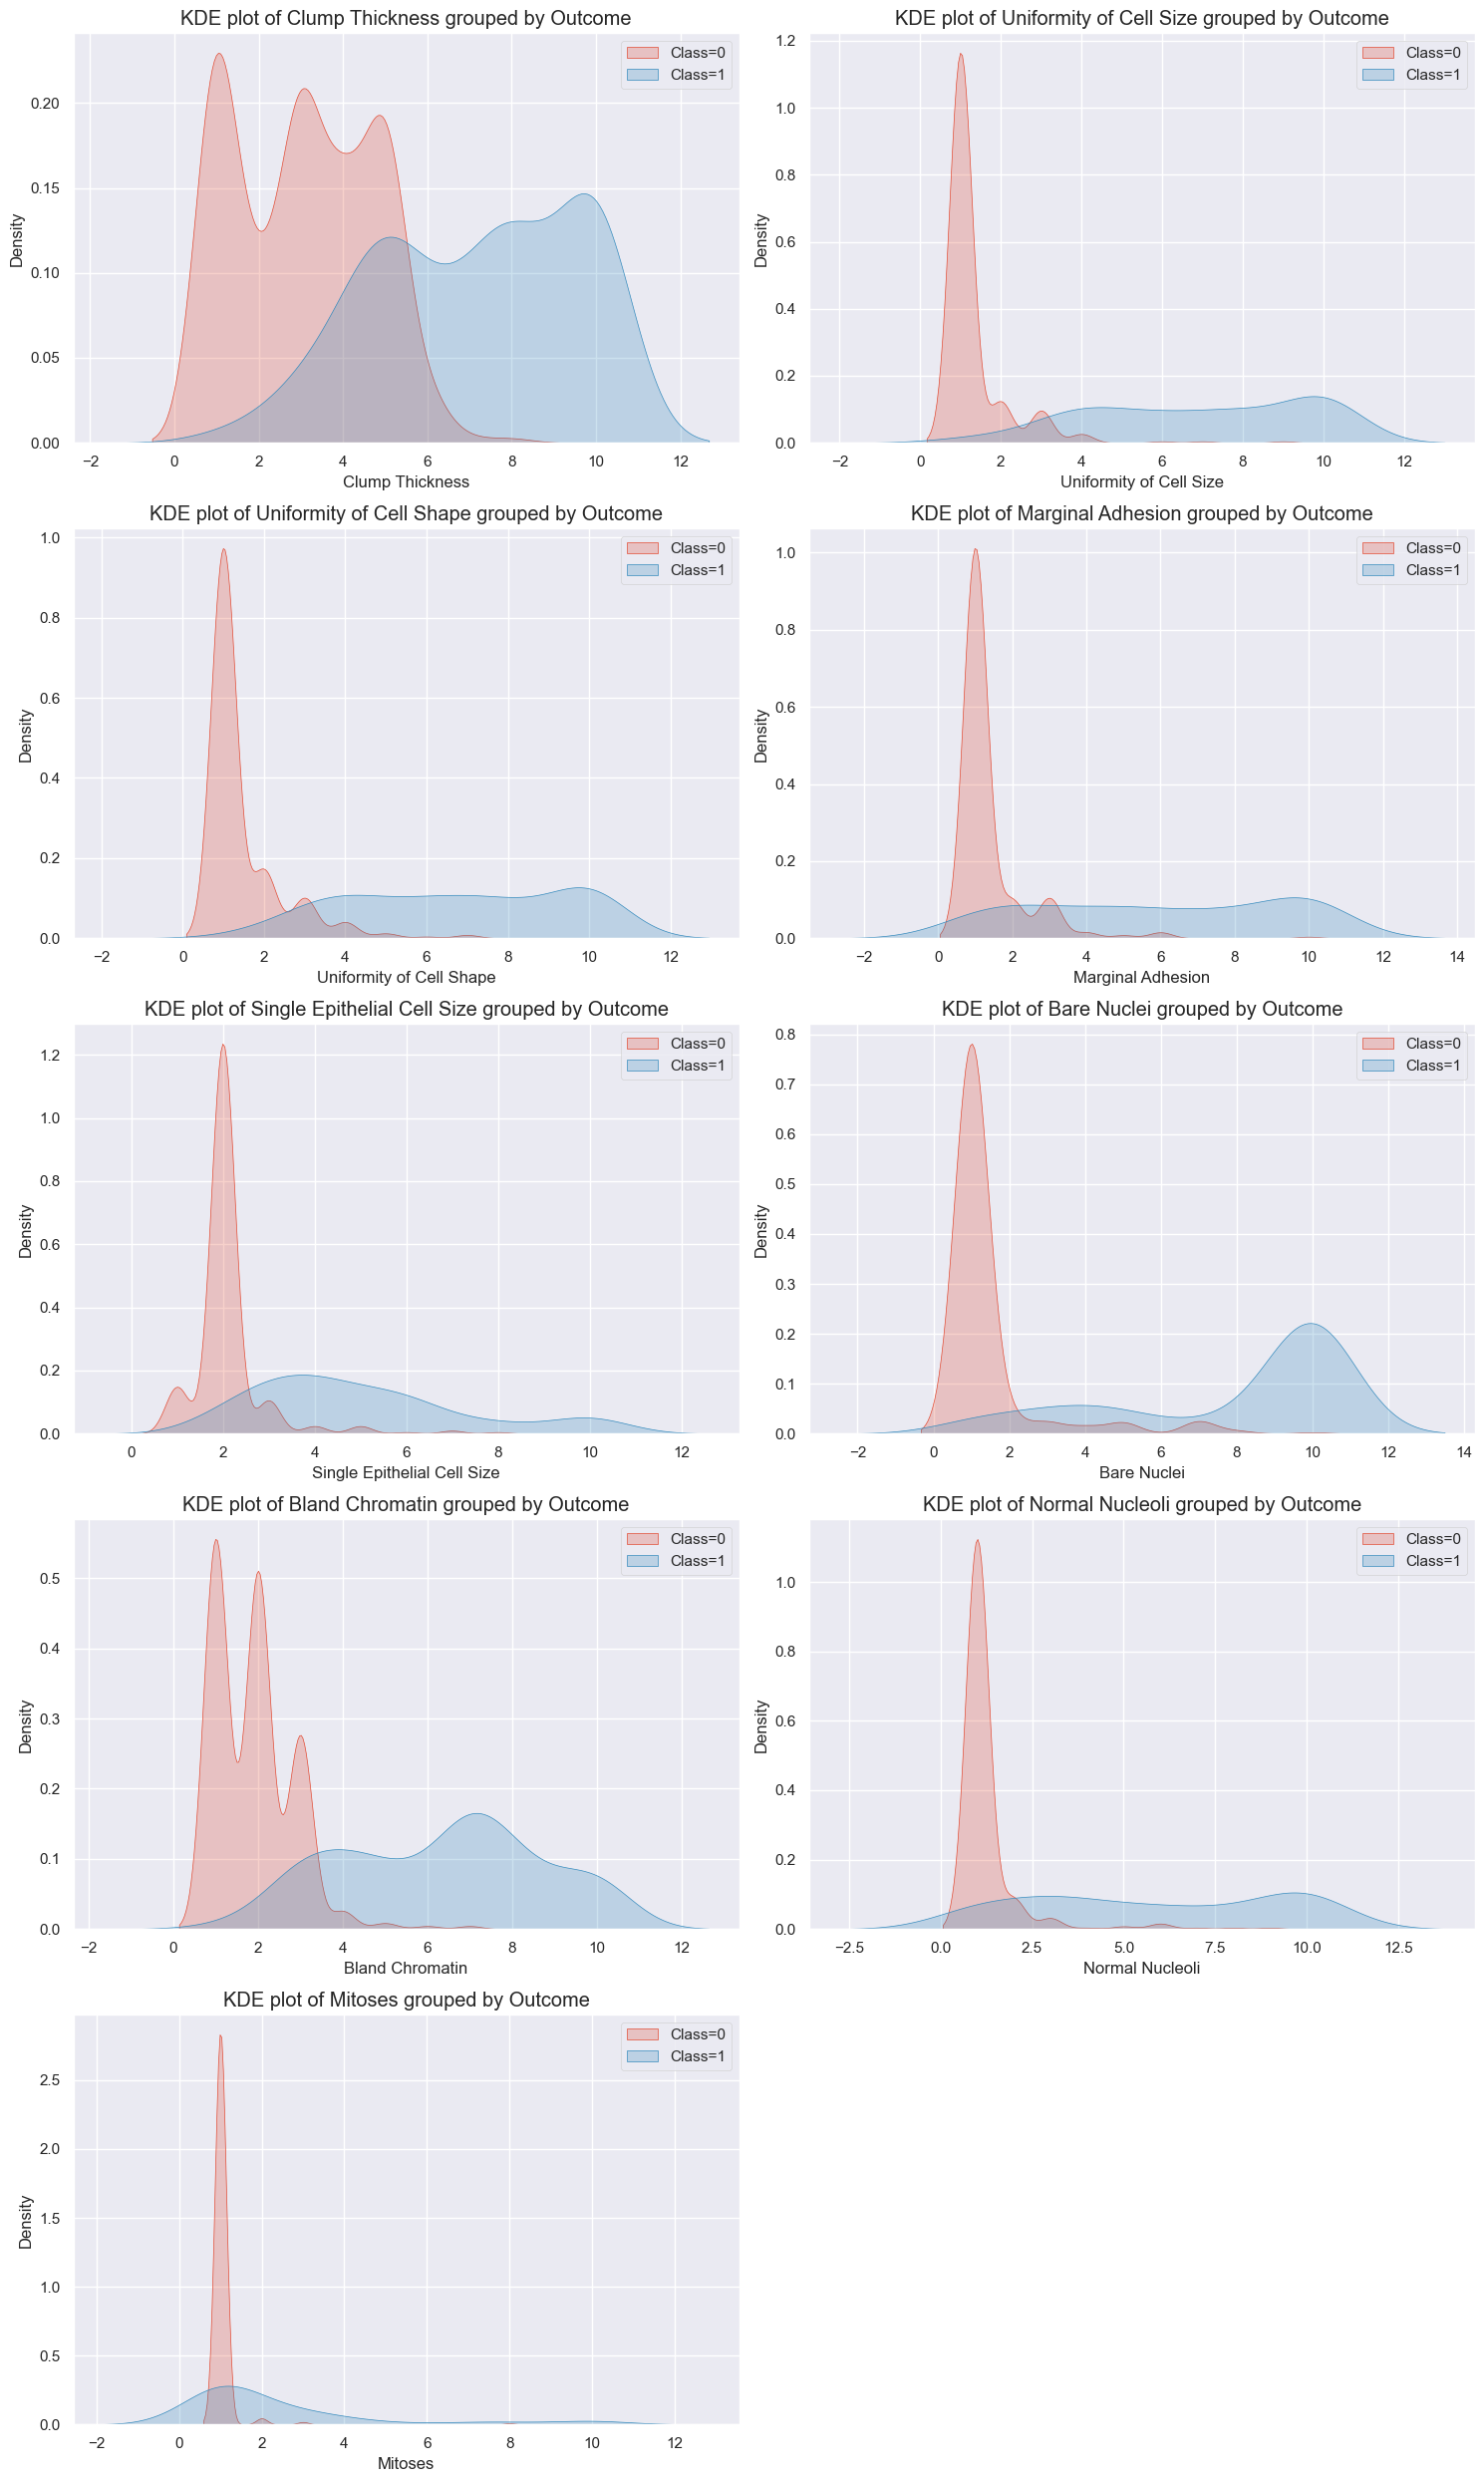

In [47]:
#Set the number of columns and rows for subplots
num_columns = len(df.columns) - 1  # Exclude 'Outcome' column
num_rows = (num_columns + 1) // 2

# Create a figure and subplots
plt.figure(figsize=(15, 5*num_rows))

# Loop through the columns and create KDE plots
for i, column in enumerate(df.columns.drop('Class')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['Class'] == 0][column], label='Class=0', fill=True)
    sns.kdeplot(data=df[df['Class'] == 1][column], label='Class=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

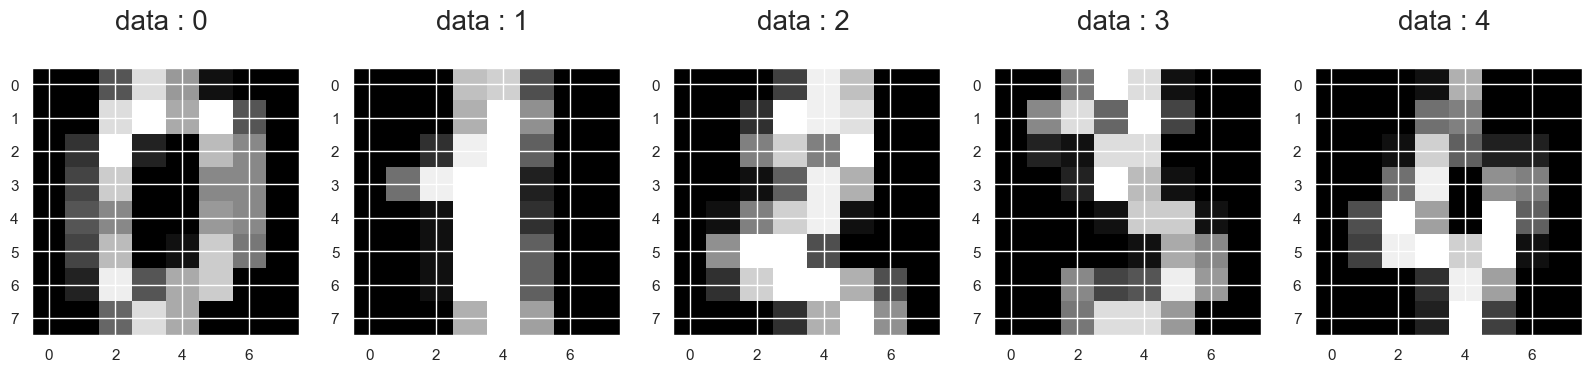

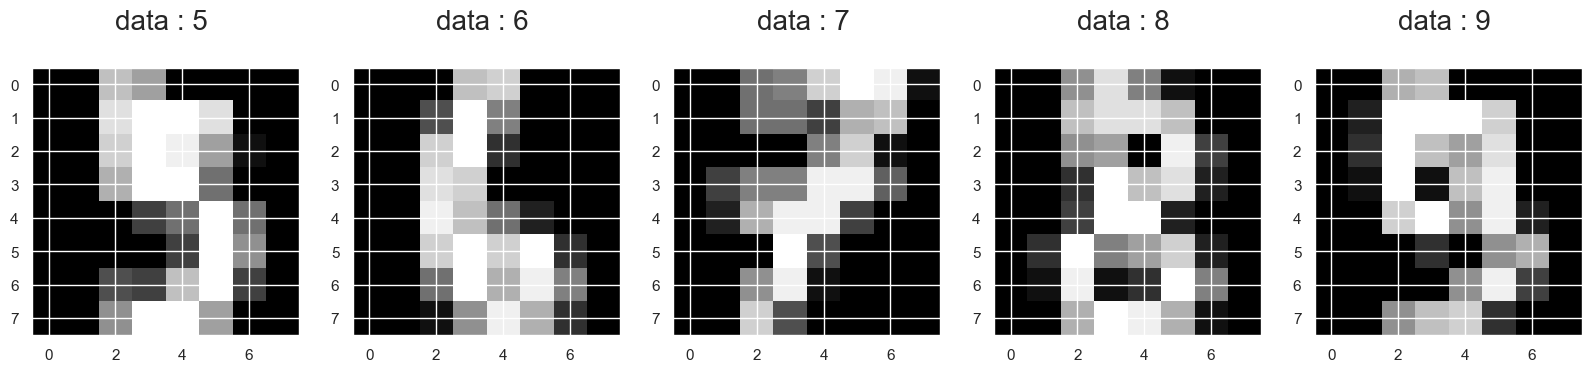

In [51]:
plt.figure(figsize = (20,4))
for i in range(0,5):
    #print(i)
    plt.subplot(1,5, i+1)
    plt.imshow(digits.images[i], cmap = plt.cm.gray)
    plt.title("data : %i \n" %digits.target[i], fontsize = 20)
    

k=5
plt.figure(figsize = (20,4))
for i in range(0,5):
    #print(i)
    j=int(i+k)
    plt.subplot(1,5, i+1)
    plt.imshow(digits.images[j], cmap = plt.cm.gray)
    plt.title("data : %i \n" %digits.target[j], fontsize = 20)

In [52]:
# datos numericos de la imagen, en un formato lineal,como 64 variables independientes
digits["data"][0]
# resultado , variable objetivo , label , este seria mi variable dependiente
digits.target[0]

# Construimos el dataset train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.25,
                                                    random_state= 666)

In [53]:
#Defino el algoritmo "logistic1" a utilizar
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression(max_iter = 2000, 
                               verbose = 1, 
                               tol = 1e-6)

In [54]:
#Entreno el modelo
logistic1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s finished


LogisticRegression(max_iter=2000, tol=1e-06, verbose=1)

In [55]:
# Hagamos la prediccion para todos los datos de prueba 
predictions = logistic1.predict(x_test)

In [56]:
# score
score = logistic1.score(x_test, y_test)
score

0.9711111111111111

Además calculamos y visualizamos la Matriz de Confusión.

Text(0.5, 1.0, 'Score 0.9711111111111111')

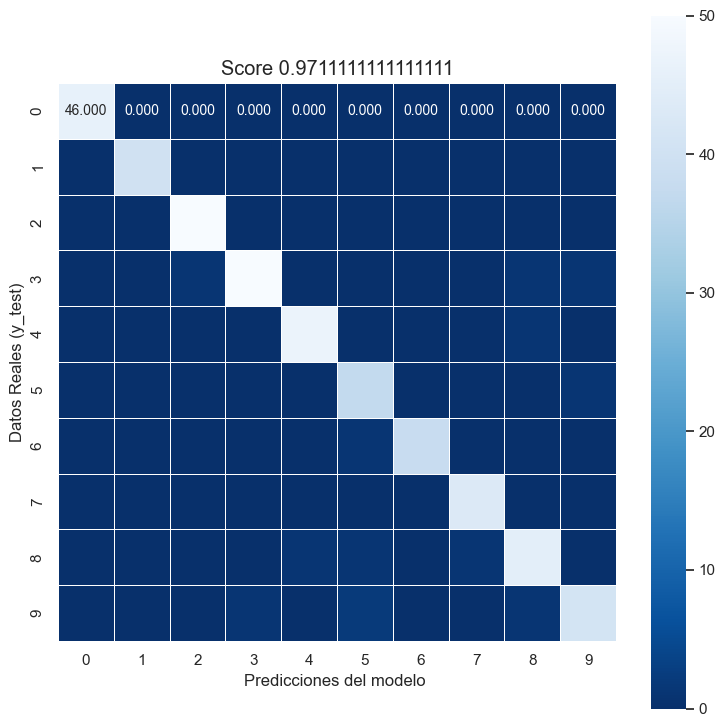

In [57]:
# Matriz de confusion 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm

# Visualicemos la matriz de confusion
import seaborn as sns
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".3f",
            linewidths=0.5, square = True,
            cmap = "Blues_r")
plt.ylabel("Datos Reales (y_test)")
plt.xlabel("Predicciones del modelo ")
plt.title("Score {0}".format(score))

El resultado del puntaje y Matriz de confusión confirman que el modelo obtenido es bueno.

